# K-means with the palmer penguins simplified dataset

Info: https://github.com/allisonhorst/palmerpenguins

Source: https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data?select=penguins_size.csv


In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

## Load and explore data

In [3]:
data = pd.read_csv('../raw_data/penguins_size.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

## Drop columns or rows with missing values and columns that will not be used for the analysis

In [5]:
# Drop sex column because it has NAs
data.drop(columns='sex', inplace=True)
# Drop entries with missing values in the other columns
data.dropna(axis=0, how='any', inplace=True)

In [6]:
print(f'There are {len(data)} observations')
data.isnull().sum()

There are 342 observations


species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [7]:
# Drop island column because only numerical columns will be used for prediction
data.drop(columns='island', inplace=True)

In [8]:
y_values = data['species'].values
y_values
data.drop(columns='species', inplace=True)
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


## Standardize x_values

In [9]:
# Use StandardScaler
scaler = StandardScaler().fit(data)
x_scaled = scaler.transform(data) # an array

features = np.array(data.columns)
x_values = pd.DataFrame(x_scaled, columns=features) # a DataFrame

In [10]:
x_values

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020
...,...,...,...,...
337,0.601305,-1.750171,0.931890,0.903175
338,0.527932,-1.445897,1.003109,0.809516
339,1.188289,-0.735923,1.501644,1.933419
340,0.234440,-1.192335,0.789451,1.246590


## Use the elbow method

In [15]:
# inertia is the sum of squared distances of samples 
# to their closest cluster center.
k_max = 10
inertia = []
accuracy_list = []
n_clusters = list(range(1, k_max))
for i in n_clusters:
    model = KMeans(n_clusters = i, max_iter = 1000)
    model.fit(x_values)
    inertia.append(model.inertia_)
    y_predicted = model.predict(x_values)
    accuracy = metrics.adjusted_rand_score(y_values, y_predicted)
    accuracy_list.append(accuracy)


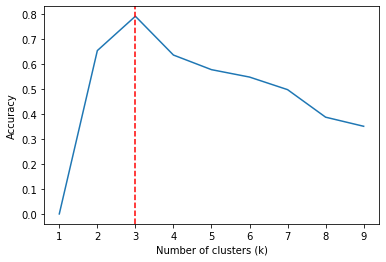

In [16]:
plt.plot(n_clusters, accuracy_list)
plt.xticks(n_clusters)
plt.axvline(3, color='red', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Accuracy')
plt.show()

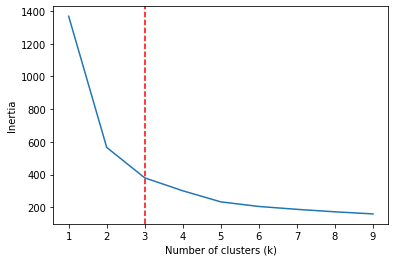

In [17]:
plt.plot(n_clusters, inertia)
plt.xticks(n_clusters)
plt.axvline(3, color='red', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

## Create model and predict values with the selected k

In [18]:
model = KMeans(n_clusters = 3, max_iter = 1000)
model.fit(x_values)
y_labels = model.labels_
y_predicted = model.predict(x_values)

In [19]:
# Obtain accuracy
accuracy = metrics.adjusted_rand_score(y_values, y_predicted)
print(accuracy)

0.7928369051321087
